Detection avec RetinaNet


/home/marceau/PycharmProjects/image_classif/venv/lib64/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/marceau/PycharmProjects/image_classif/venv/lib64/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/home/marceau/PycharmProjects/image_classif/venv/lib64/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained_backbone' is deprecated since 0.13 and may be removed in the future, please use 'weights_backbone' instead.
  warnings.warn(
/home/marceau/PycharmProjects/image_classif/venv/lib64/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Argume

person  :  96.63  :  [618, 40, 758, 365]
--------------------------------
person  :  88.39  :  [497, 169, 583, 359]
--------------------------------
person  :  84.87  :  [7, 110, 218, 432]
--------------------------------
person  :  82.35  :  [273, 137, 390, 429]
--------------------------------
cell phone  :  73.92  :  [613, 90, 635, 122]
--------------------------------
person  :  66.47  :  [586, 185, 617, 274]
--------------------------------
person  :  60.86  :  [620, 232, 650, 294]
--------------------------------
car  :  58.74  :  [375, 193, 486, 348]
--------------------------------

------------------------------



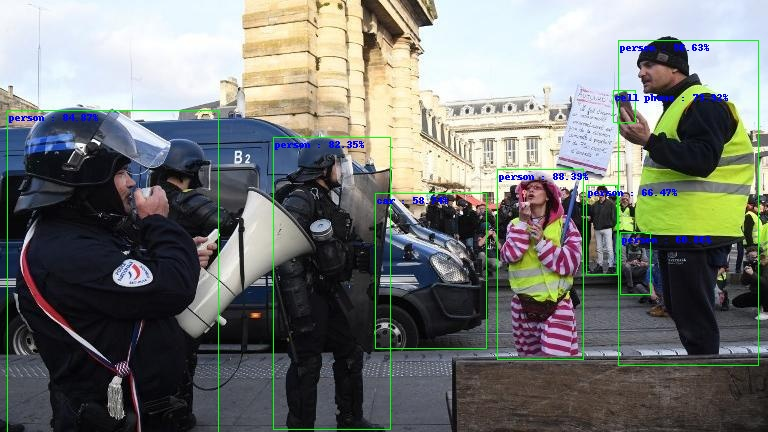

Detection avec YOLOv3
person  :  99.96  :  [21, 109, 198, 432]
--------------------------------
person  :  99.97  :  [495, 171, 584, 360]
--------------------------------
person  :  96.07  :  [620, 41, 756, 355]
--------------------------------
person  :  99.97  :  [266, 127, 373, 432]
--------------------------------
person  :  100.0  :  [155, 143, 241, 427]
--------------------------------
person  :  99.95  :  [587, 182, 618, 274]
--------------------------------
person  :  83.21  :  [727, 195, 767, 317]
--------------------------------
person  :  99.95  :  [613, 191, 637, 263]
--------------------------------
person  :  99.64  :  [571, 185, 595, 269]
--------------------------------

------------------------------



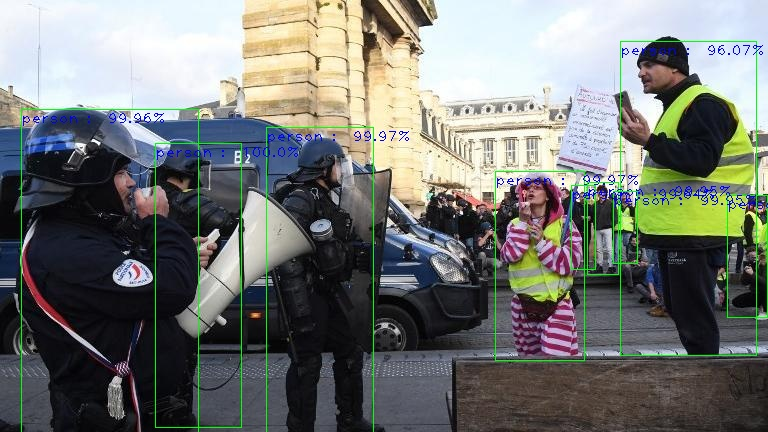

Detection avec TinyYOLOv3
person  :  99.92  :  [600, 41, 744, 360]
--------------------------------
person  :  97.54  :  [22, 120, 188, 418]
--------------------------------
person  :  90.92  :  [262, 164, 387, 408]
--------------------------------
person  :  99.22  :  [595, 200, 608, 250]
--------------------------------

------------------------------



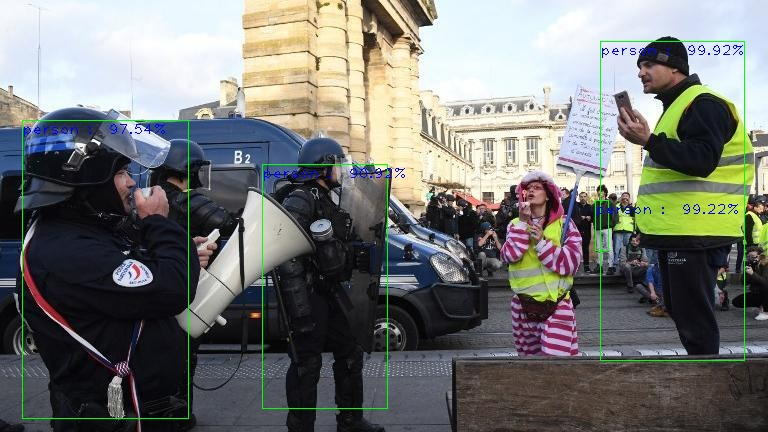

CPU times: user 9.51 s, sys: 3.6 s, total: 13.1 s
Wall time: 13.1 s


In [1]:
%%time
from imageai.Detection import ObjectDetection
import os
from IPython.display import Image, display_jpeg

execution_path = os.getcwd()

detectors = [
    (ObjectDetection(), "setModelTypeAsRetinaNet",  "retinanet_resnet50_fpn_coco-eeacb38b.pth"),
    (ObjectDetection(), "setModelTypeAsYOLOv3", "yolov3.pt"),
    (ObjectDetection(), "setModelTypeAsTinyYOLOv3",  "tiny-yolov3.pt"),
    ]

for detector, detector_type, detector_path in detectors:
    nom = detector_type.split("As")[1]
    print(f"Detection avec {nom}")
    detector.__getattribute__(detector_type)()
    detector.setModelPath(os.path.join(execution_path, "modeles/detection", detector_path))
    detector.loadModel()

    detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "b.png"), output_image_path=os.path.join(execution_path , f"{nom}.jpg"), minimum_percentage_probability=30)

    for eachObject in detections:
        print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
        print("--------------------------------")

    print("\n------------------------------\n")

    x = Image(filename=f'{nom}.jpg')

    display_jpeg(x)


